# Regression Analysis
## Linear Regression
Since our main problem to address involves the classification of track genres, there is not much use in performing linear regression. However, in exploring the data and conducting some preliminary analyses before we settled on the primary topic of our project, we did use linear regression to predict the loudness of a song from its energy, seeing as they were fairly correlated from EDA. We also compared the fit to a ridge regression model, though the results indicate that ridge regression had minimal effect on the regression. The original model was simple enough to not have overfitted to the training data, as indicated by the similar mean-squared errors of the training and testing sets. Therefore, applying ridge regression did not impact the model, as no regularization was really needed.

In [6]:
from preprocessing import preprocessing_data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from tabulate import tabulate

df_raw = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df_raw.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df = preprocessing_data(df_raw)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,2.649298,-0.006052,-0.269845,0.772078,-0.576963,-1.207279,0.418333,-1.334094,0.208701,-0.925032,-0.730042,0.546130,1.019781,-1.044768,0.251823,acoustic
1,1.552766,-0.617908,-0.269845,-0.613101,-1.599839,-1.207279,-1.210941,0.749572,-0.168184,1.489525,-0.730030,-0.623468,-0.645836,-1.365779,0.251823,acoustic
2,1.674603,-0.155816,-0.269845,-0.515706,-0.930635,-1.489329,-0.045798,0.749572,-0.284583,-0.443637,-0.730045,-0.550653,-1.192366,-1.401395,0.251823,acoustic
3,2.527461,-0.222945,-0.269845,-1.446373,-1.968767,-1.489329,-1.409766,0.749572,-0.394202,1.438083,-0.729858,-0.482389,-1.106855,1.843433,-1.492996,acoustic
4,3.197564,-0.246195,-0.269845,0.458248,-0.639375,-0.925229,-0.037566,0.749572,-0.302100,0.257608,-0.730045,-0.705841,-1.017625,-0.058711,0.251823,acoustic


In [8]:
X = df[['energy']]
y = df[['loudness']]

# create the training and testing (validation) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit a linear regression model regressing loudness on energy
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5162500492676798

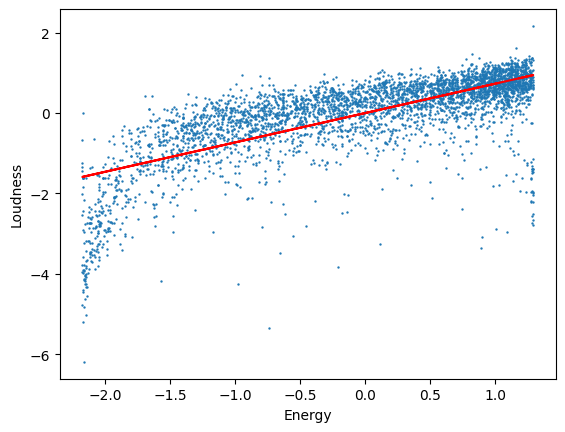

In [9]:
# plot a scatterplot of the data and the regression line
plt.plot(X_test, reg.predict(X_test), color = 'r')
plt.scatter(X_test, y_test, s = 0.5)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [10]:
train_MSE = mean_squared_error(y_train, reg.predict(X_train))
test_MSE = mean_squared_error(y_test, reg.predict(X_test))
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Train MSE:  0.46325287297668893
Test MSE:  0.4879972694608504


In [11]:
from sklearn.linear_model import Ridge

# employ ridge regression with alpha = 1
lin_with_regularization = Ridge(alpha = 1)
lin_with_regularization.fit(X_train, y_train)
lin_with_regularization.score(X_test, y_test)

0.5162509007596237

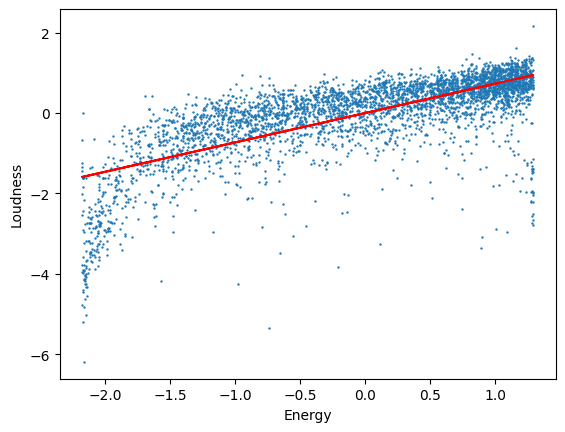

In [12]:
plt.plot(X_test, lin_with_regularization.predict(X_test), color = 'r')
plt.scatter(X_test, y_test, s = 0.5)
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [13]:
train_MSE = mean_squared_error(y_train, lin_with_regularization.predict(X_train))
test_MSE = mean_squared_error(y_test, lin_with_regularization.predict(X_test))
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Train MSE:  0.4632528750787887
Test MSE:  0.4879964104928177


## Logistic Regression

In [14]:
rando = 1
df_logistic = df.copy()

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df_logistic.drop(['track_genre'], axis=1),
    df_logistic.track_genre, test_size=0.2, random_state=rando)

pipeline = make_pipeline(
    LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
)
pipeline.fit(X_train, y_train)

# Determine the model's accuracy
accuracy = pipeline.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.55


In [15]:
from sklearn.model_selection import cross_val_score
cv_score_logistic = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='accuracy')
cv_score_logistic

array([0.51879699, 0.51503759, 0.55834379, 0.52446675, 0.54203262])

In [16]:
np.mean(cv_score_logistic)

0.5317355496646259

### Feature Importance using Logistic Regression

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

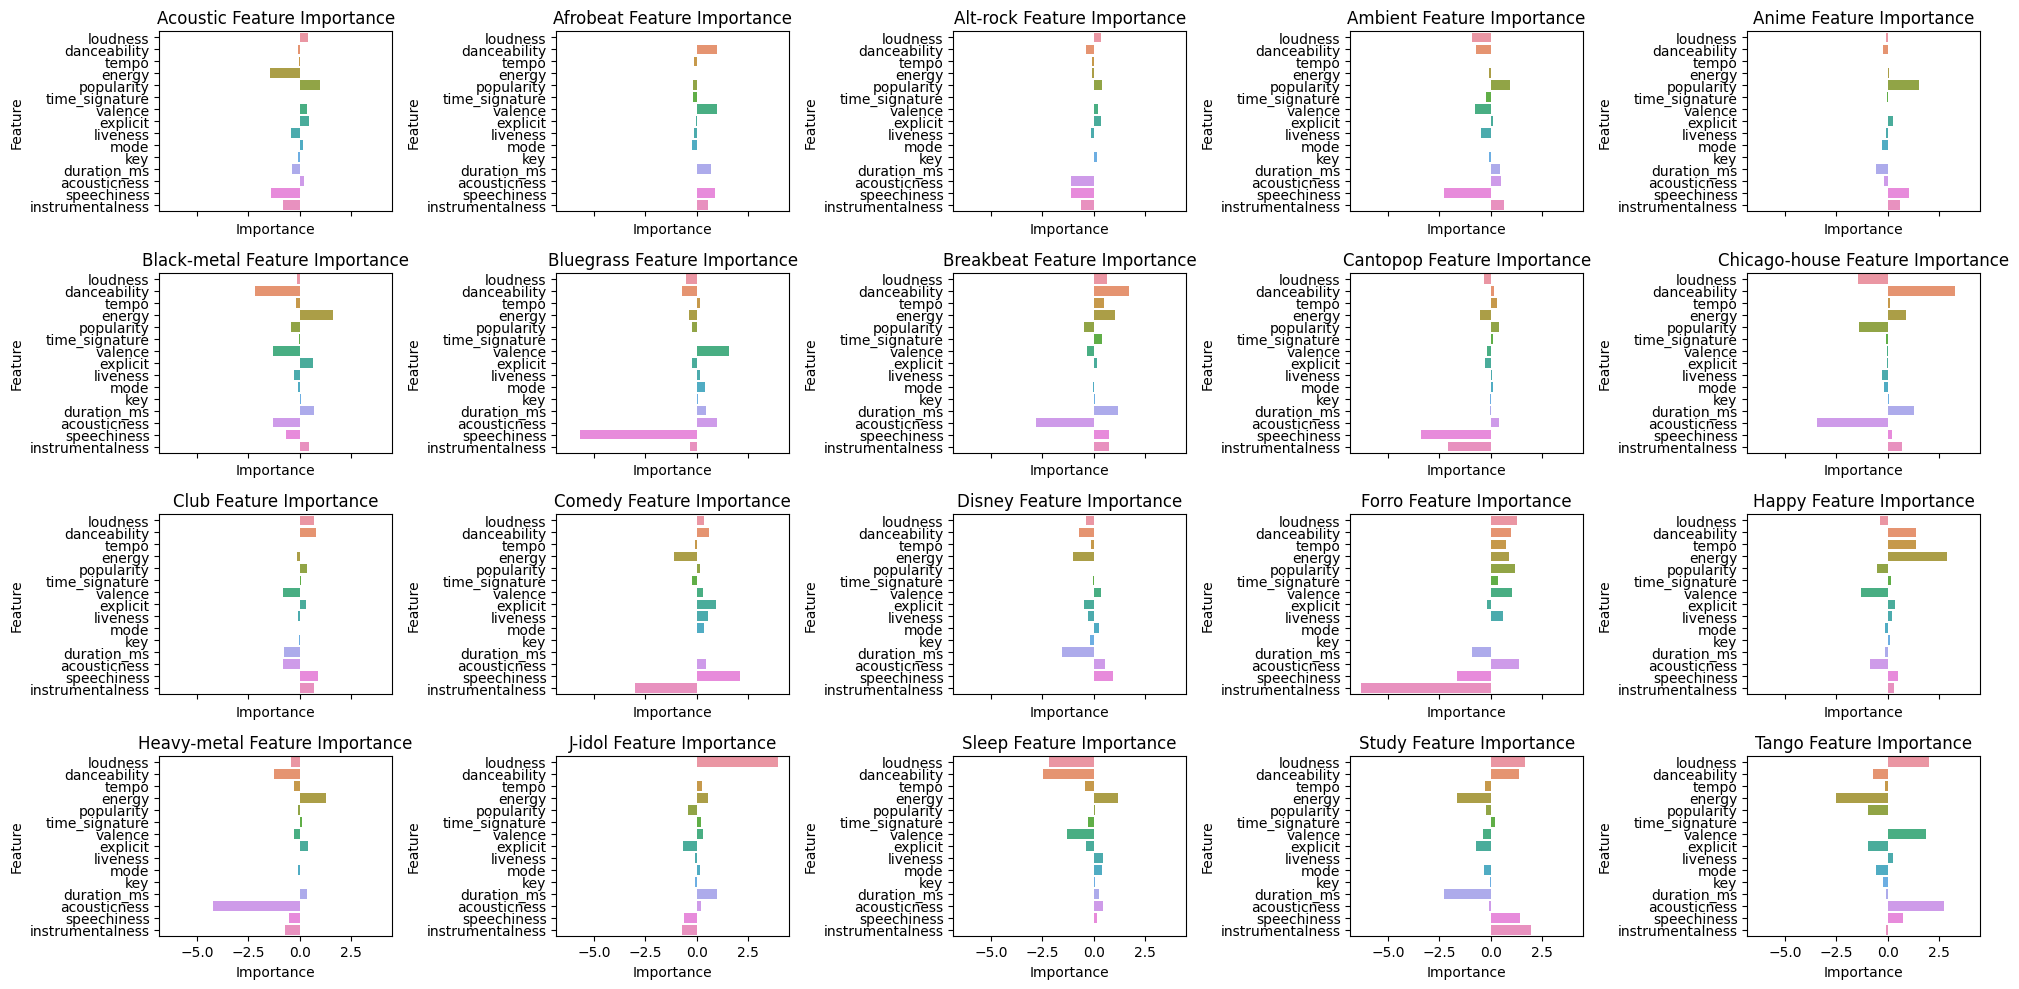

In [18]:
# Determine the importance of each of the features
model = pipeline.named_steps['logisticregression']
genres = df['track_genre'].unique()

feature_importance = pd.DataFrame(model.coef_, columns=X_train.columns, index=genres)
feature_importance['Genre'] = model.classes_

feature_importance_melted = feature_importance.melt(id_vars='Genre', var_name='Feature', value_name='Importance')

average_importance = feature_importance_melted.groupby('Feature')['Importance'].mean().sort_values(ascending=False).index
feature_importance_melted['Feature'] = pd.Categorical(feature_importance_melted['Feature'], categories=average_importance, ordered=True)

# Build bar plots for each of the genres, showing the importance of each feature
fig, axes = plt.subplots(4, 5, figsize=(20, 10), sharex=True)

for i, genre in enumerate(genres):
    ax = axes[i // 5, i % 5]
    sns.barplot(x='Importance', y='Feature', data=feature_importance_melted[feature_importance_melted['Genre'] == genre], ax=ax)
    ax.set_title(f'{genre.capitalize()} Feature Importance')

plt.tight_layout()
plt.show()

We can see that there is a clear difference in the importance of features like popularity, instrumetalness, and energy versus the less important features like mode, time signature, and key.

+---------------+------------+-------------+----------+--------------+---------+---------+----------+---------+-------------+--------------+------------------+----------+---------+---------+----------------+---------------+
|               | popularity | duration_ms | explicit | danceability | energy  |   key   | loudness |  mode   | speechiness | acousticness | instrumentalness | liveness | valence |  tempo  | time_signature |     Genre     |
+---------------+------------+-------------+----------+--------------+---------+---------+----------+---------+-------------+--------------+------------------+----------+---------+---------+----------------+---------------+
|   acoustic    |   0.9688   |   -0.3552   |  0.4672  |   -0.0825    | -1.4465 | -0.0691 |  0.4123  |  0.152  |   -1.3882   |    0.2297    |     -0.7978      | -0.4085  | 0.3651  | -0.0107 |     0.0357     |   acoustic    |
|   afrobeat    |  -0.1846   |   0.6925    | -0.0426  |    0.9703    | 0.0202  | -0.0005 |   0.0    | -0

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


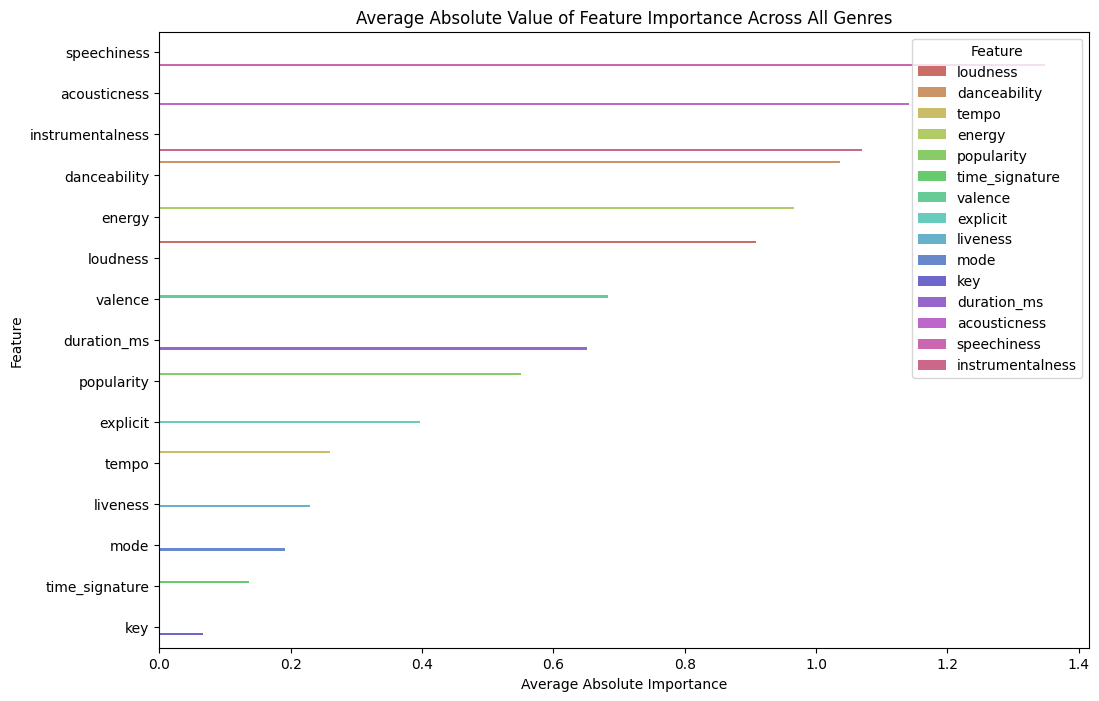

In [19]:
# Print out the importance values for each of the features by genre
print(tabulate(feature_importance.round(4), headers='keys', tablefmt='pretty', numalign='center', stralign='center'))

# Calculate the average absolute value of importance for each feature
average_abs_importance = feature_importance_melted.groupby('Feature', observed=False)['Importance'].apply(lambda x: np.mean(np.abs(x)))

# Create a DataFrame for plotting
average_abs_importance_df = average_abs_importance.reset_index().sort_values(by='Importance', ascending=False)

# Plot the average absolute value of importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=average_abs_importance_df, hue='Feature', palette='hls', order=average_abs_importance_df.sort_values('Importance', ascending=False).Feature)
plt.title('Average Absolute Value of Feature Importance Across All Genres')
plt.xlabel('Average Absolute Importance')
plt.ylabel('Feature')
plt.show()